<a href="https://colab.research.google.com/github/PSuade/Geometric-Algorithms-Analysis/blob/main/Divide_and_conquer_Closest_Pair_of_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Divide and conquer Closest Pair of Points: ((34, 635), (34, 635)) with distance 0.0 with runime 0.05216670036315918
Brute Force Closest Pair of Points: ((34, 635), (34, 635)) with distance 0.0 with runtime 48.955243825912476


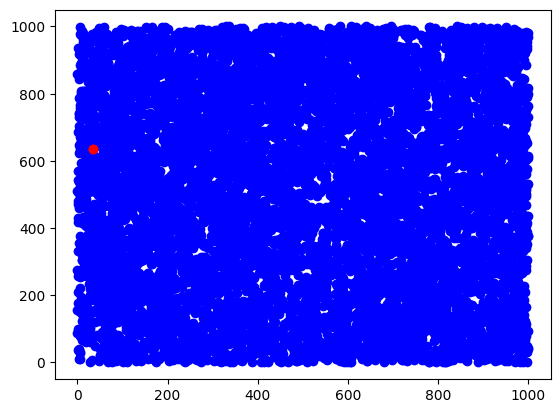

In [18]:
import math
import random
import time
import matplotlib.pyplot as plt


def distanceFormula(p1, p2): #take in 2 points and apply the distance formula to them
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def generatePoints(n): #randomly generate an X and Y value between 0 and 1000 for a list of points n times
    for i in range(n):
        x = random.randint(0,1000)
        y = random.randint(0,1000)
        points.append((x,y))
    return points

def bruteForceClosestPair(points): # compare each points distance to determine the minimum
    minDistance = float('inf')
    closestPair = (None, None)
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = distanceFormula(points[i], points[j])
            if distance < minDistance:
                minDistance = distance
                closestPair = (points[i], points[j])
    return minDistance, closestPair

def stripClosest(strip, dist): # check for any potential overlap between seperate lists of points
    minDistance = dist
    closestPair = None
    for i in range(len(strip)):
        j = i + 1
        while j < len(strip) and (strip[j][1] - strip[i][1]) < minDistance:
            distance = distanceFormula(strip[i], strip[j])
            if distance < minDistance:
                minDistance = distance
                closestPair = (strip[i], strip[j])
            j += 1
    return minDistance, closestPair

def closestPair(points): # split the list into several smaller lists to speed up runtime
    n = len(points)
    if n <= 3:
        return bruteForceClosestPair(points)

    mid = n // 2
    left = points[:mid]
    right = points[mid:]
    leftDist, leftPair = closestPair(left)
    rightDist, rightPair = closestPair(right)
    dist = min(leftDist, rightDist)
    strip = [point for point in points if abs(point[0] - points[mid][0]) < dist]
    strip.sort(key=lambda point: point[1])
    stripDist, stripPair = stripClosest(strip, dist)

    if stripPair:
        return min(dist, stripDist), stripPair
    elif leftDist <= rightDist:
        return leftDist, leftPair
    else:
        return rightDist, rightPair

# test run
points = []
points = generatePoints(100) #change this value to alter the number of points generated
points.sort()
DCstartTime = time.time()
closestDistance, closestPair = closestPair(points)
DCendTime = time.time()
DCrunTime = DCendTime-DCstartTime
print("Divide and conquer Closest Pair of Points:", closestPair, "with distance", closestDistance, 'with runime', DCrunTime)
BFstartTime = time.time()
BFdistance, BFclosestPair = bruteForceClosestPair(points)
BFendTime = time.time()
BFrunTime = BFendTime-BFstartTime
print("Brute Force Closest Pair of Points:", closestPair, "with distance", closestDistance, "with runtime", BFrunTime)
X,Y = zip(*points)
ClosestX, ClosestY = zip(*closestPair)
plt.plot(X,Y,'ob')
plt.plot(ClosestX,ClosestY,'or')